# Clase 12 - Pandas

### Anuncios
- Nuevo ambiente
- Req. 3


### Hoy:
- Pandas

# Distribucion notas
<img src="notasp1.png" alt="drawing" width="600"/>

### Bases de Datos

Con un software de "bases de datos", usualmente queremos realizar las siguientes operaciones:

- Leer una base de datos
- Creación de nuevas columnas ("variables")
- Filtro de datos (por ej: para individuos específicos o fechas específicas)
- Tablas resúmen o agregadas (por ej: estadísticas por fecha o por zona geográfica)
- Cruce de datos (unir información nueva basados en algún ID)
- Unión de bases de datos
- Grabar una base de datos

Python tiene varias librerias para trabajar con bases de datos. Una de las más famosas es "Pandas".

### Objetos importantes de la librería Pandas

### 1. "DataFrame"

Este objeto es muy similar a lo que entendemos comúnmente por "base de datos", donde tenemos N filas y K columnas.

*Documentación sobre atributos y métodos de DataFrames: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html*

*Documentación sobre atributos y métodos de Series: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html*

### 2. "Series"

Es la "base de datos" más simple de Pandas. Una serie puede ser entendida como un vector de datos (1 dimensión). Todo DataFrame está formado por "Series" individuales, unidas por un índice común.

### 3. "GroupBy"

Un objeto "GroupBy" es un objeto que construimos desde una base de datos "desagrupada" y nos permite crear bases de datos "agrupadas", según las reglas agrupación que definamos.

Documentación completa aquí: http://pandas.pydata.org/pandas-docs/stable/groupby.html

Funciones disponibles: http://pandas.pydata.org/pandas-docs/stable/api.html?highlight=groupby#groupby

### Ejercicio en clase


Grafique la TPM del Banco Central

In [2]:
import requests
import pandas as pd

user='160749849'

serie = 'F073.TCO.PRE.Z.D'

url = f"https://si3.bcentral.cl/SieteRestWS/SieteRestWS.ashx?" + \
    f"user={user}&pass={pwd}&firstdate=2021-01-01&lastdate=2023-08-31&" + \
    f"timeseries={serie}&function=GetSeries"

response = requests.get(url)
data = response.json()["Series"]["Obs"]

df1 = pd.DataFrame(data)
df1

NameError: name 'pwd' is not defined

In [ ]:
df['value'].plot()

TypeError: no numeric data to plot

Los datos fueron leidos como texto... confirmemos lo anterior.

In [ ]:
df.value

0        0.5
1        0.5
2        0.5
3        0.5
4        0.5
       ...  
965      NaN
966    10.25
967    10.25
968    10.25
969    10.25
Name: value, Length: 970, dtype: object

Para Pandas, una serie "object" se puede interpretar como una serie con texto. Podemos tratar de transformar los datos a número:

Son tipos meszclados pero moyermente llegan como texto y no como numeros

In [ ]:
df['valor'] = df['value'].astype(float)
df.valor

0       0.50
1       0.50
2       0.50
3       0.50
4       0.50
       ...  
965      NaN
966    10.25
967    10.25
968    10.25
969    10.25
Name: valor, Length: 970, dtype: float64

Ahora sí podemos graficar...

In [ ]:
df.valor

<Axes: >

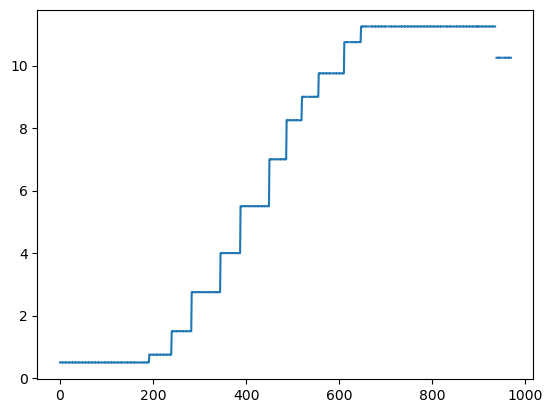

In [ ]:
df['valor'].plot()

¿cómo podemos usar la fecha en el eje Y? Veamos qué tipo de Serie es "indexDateString"

In [ ]:
df['indexDateString']

0      04-01-2021
1      05-01-2021
2      06-01-2021
3      07-01-2021
4      08-01-2021
          ...    
965    27-08-2023
966    28-08-2023
967    29-08-2023
968    30-08-2023
969    31-08-2023
Name: indexDateString, Length: 970, dtype: object

También es un "texto"... transformemos a fecha

In [ ]:
df['fecha'] = pd.to_datetime(df['indexDateString'], format="%d-%m-%Y")
df

,indexDateString,value,statusCode,valor,fecha
0,04-01-2021,0.5,OK,0.50,2021-01-04
1,05-01-2021,0.5,OK,0.50,2021-01-05
2,06-01-2021,0.5,OK,0.50,2021-01-06
3,07-01-2021,0.5,OK,0.50,2021-01-07
4,08-01-2021,0.5,OK,0.50,2021-01-08
...,...,...,...,...,...
965,27-08-2023,NaN,ND,NaN,2023-08-27
966,28-08-2023,10.25,OK,10.25,2023-08-28
967,29-08-2023,10.25,OK,10.25,2023-08-29
968,30-08-2023,10.25,OK,10.25,2023-08-30


Ahora podemos usar la fecha como índice de la base:


In [ ]:
df = df.set_index('fecha')
df

,indexDateString,value,statusCode,valor
fecha,,,,
2021-01-04,04-01-2021,0.5,OK,0.50
2021-01-05,05-01-2021,0.5,OK,0.50
2021-01-06,06-01-2021,0.5,OK,0.50
2021-01-07,07-01-2021,0.5,OK,0.50
2021-01-08,08-01-2021,0.5,OK,0.50
...,...,...,...,...
2023-08-27,27-08-2023,NaN,ND,NaN
2023-08-28,28-08-2023,10.25,OK,10.25
2023-08-29,29-08-2023,10.25,OK,10.25


Grafiquemos nuevamente

<Axes: xlabel='fecha'>

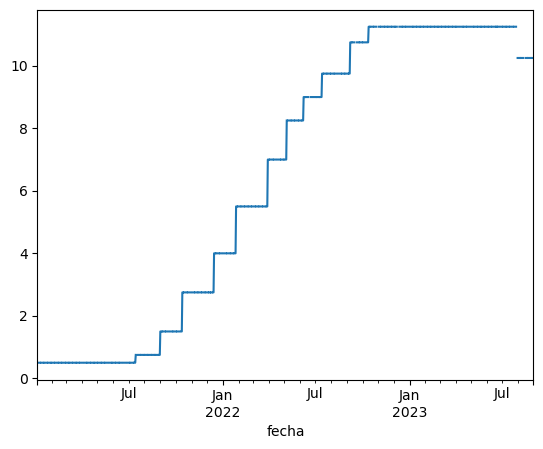

In [ ]:
df['valor'].plot()

Y si quiero comparar con la tasa (promedio) que pagan los bancos por los depósitos?

In [ ]:
serie = 'F022.TDB.TIS.D030.NO.Z.D'

url = f"https://si3.bcentral.cl/SieteRestWS/SieteRestWS.ashx?" + \
    f"user={user}&pass={pwd}&firstdate=2021-01-01&lastdate=2023-08-31&" + \
    f"timeseries={serie}&function=GetSeries"

response = requests.get(url)
data = response.json()["Series"]["Obs"]

df2 = pd.DataFrame(data)
df2

,indexDateString,value,statusCode
0,04-01-2021,0.24,OK
1,05-01-2021,0.24,OK
2,06-01-2021,0.24,OK
3,07-01-2021,0.24,OK
4,08-01-2021,0.23,OK
...,...,...,...
965,27-08-2023,NaN,ND
966,28-08-2023,10,OK
967,29-08-2023,9.85,OK
968,30-08-2023,9.76,OK


Debemos aplicar las mismas operaciones que se aplicaron al otro database

In [ ]:
df2['valor'] = df2['value'].astype(float)
df2['fecha'] = pd.to_datetime(df2['indexDateString'], format="%d-%m-%Y")
df2 = df2.set_index('fecha') # df2.set_index('fecha', inplace=True)
df2

In [ ]:
df = df1.merge(df2, left_index=True, right_index=True) # left_index means left dataframe index and right_index means right dataframe index

Tratar de juntar las dos bases de datos en una sola y averiguarar por que no se puede solo con

```python
df = df1.merge(df2)
```